In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([[2, 4],
             [5, -6]])
print(f"a = \n{a}\n")

a = 
[[ 2  4]
 [ 5 -6]]



angle: 45 ==> theta: 0.7853981633974483
[[0 0]]


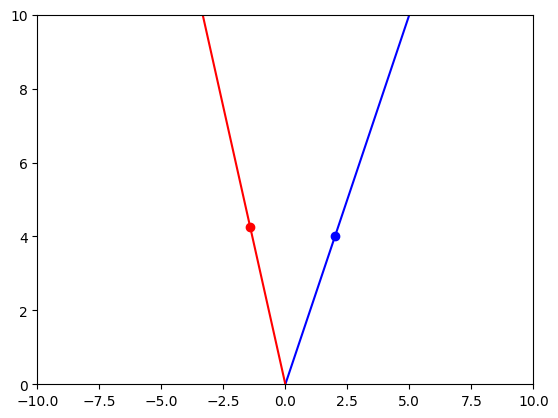

In [43]:
''' 어떤 벡터를 반시계 방향으로 (원점을 기준으로)theta(쎄타)만큼 회전시켜주는 회전 행렬 '''
def rot_mat(theta, reverse):
    match reverse:
        case True: # 반시계 방향으로 회전
            return np.array([[np.cos(theta), -np.sin(theta)],
                              [np.sin(theta), np.cos(theta)]])
        case False: # 시계 방향으로 회전
            return np.array([[np.cos(theta), np.sin(theta)],
                              [-np.sin(theta), np.cos(theta)]])

theta = 0.5 # 라디안을 기준으로 한 각이며, "1 rad = 180도 / 파이"로 계산한다

angle = 45
theta = angle * (np.pi / 180)
print(f"angle: {angle} ==> theta: {theta}")

zero = np.zeros((1, 2), dtype=np.int16) # 원점
x = np.array([[2, 4]])
n_x = rot_mat(theta, True) @ np.transpose(x)
n_x = np.transpose(n_x)

plt.plot(x[0][0], x[0][1], "bo")
plt.axline(x[0], zero[0], color="b")
plt.plot(n_x[0][0], n_x[0][1], "ro")
plt.axline(n_x[0], zero[0], color="r")

plt.xlim(-10, 10)
plt.ylim(0, 10)
plt.show()

In [7]:
a = np.array([[2, 4],
             [5, -6]])
b = np.array([[2], [2]])
d = a.dot(b) # 행렬곱(내적) 계산
print(d, d.shape)

d_ = a @ b # 마찬가지로 행렬곱(내적) 계산이다
print(d_, d_.shape)

[[12]
 [-2]] (2, 1)
[[12]
 [-2]] (2, 1)


In [10]:
''' 전치 '''
print("original:\n", a)
print(a.transpose())
print(np.transpose(a))

''' 역행렬 '''
# 역행렬은 어떤 n차 정사각행렬 a가 있을 때 이와 교환법칙을 만족하는 행렬곱을 수행하여 n차 정사각 단위행렬 E를 만들어내는 행렬을 말한다
# 어떤 행렬 a에 대한 역행렬이 존재할 때 그것을 a inverse라고 읽는다
# 어떤 행렬의 역행렬이 존재하기 위해서는 그 행렬의 행렬식(determinant)가 0이 되어서는 안된다(만약 0이라면 역행렬은 존재하지 않는다)
# 역행렬 계산 시 행렬식이 0이 되는 상황을 singular라고 한다
inv_a = np.linalg.inv(a)
print(inv_a)

original:
 [[ 2  4]
 [ 5 -6]]
[[ 2  5]
 [ 4 -6]]
[[ 2  5]
 [ 4 -6]]
[[ 0.1875   0.125  ]
 [ 0.15625 -0.0625 ]]


In [14]:
print(inv_a * a) # 일반 곱 연산자를 사용하면 element-wise 곱으로 계산된다
print(np.matmul(inv_a, a))
print(inv_a.dot(a))

[[0.375   0.5    ]
 [0.78125 0.375  ]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


In [46]:
''' 단위행렬 '''
# I_n 또는 E_n로 나타내는 n차 단위행렬은 n X n의 정사각행렬이다
# 주대각선의 성분이 모두 1이고, 나머지 성분들은 모두 0이다
# 단위행렬과의 행렬곱은 교환법칙이 성립하며, 그 결과는 항상 단위행렬과 행렬곱을 수행한 행렬 자기 자신이 나온다
# 따라서 단위행렬은 행렬곱에서의 항등원이다
print(np.identity(5)) # 5차 단위행렬
print(np.zeros((2, 4))) # 영행렬

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


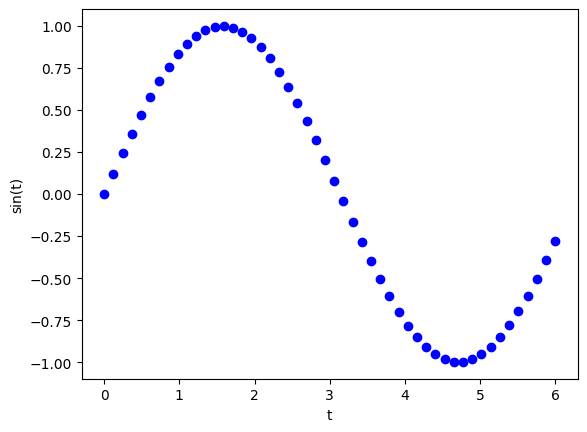

In [48]:
t = np.linspace(0, 6, 50)
y = np.sin(t)

plt.figure(1)
plt.plot(t, y, "bo")
plt.xlabel("t")
plt.ylabel("sin(t)")
plt.show(block=False) # "block=False"는 모든 도표 창(figure window)들이 닫히지 않아도 그 다음 코드를 실행할 수 있도록 한다
                      # "block=True"는 모든 도표 창들이 닫힐 때 까지 이후의 모든 코드 실행을 막는다

# 지금은 쥬피터 랩이라서 아래 코드들이 작동되지 않는다
plt.pause(5) # 다음 코드를 실행하기 전에 일정 시간동안 일시정지시킨다
plt.close() # 창으로 띄워진 그래프 창을 닫는다

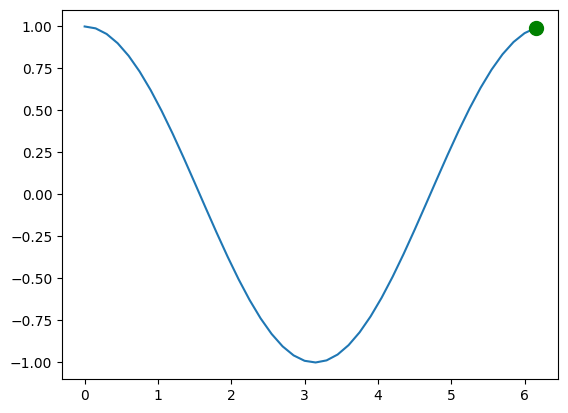

In [74]:
from IPython.display import clear_output

t = np.arange(0, 2 * np.pi, 0.15) # 0 ~ 2파이 구간에서 0.1 간격으로 표본을 추출한다
y = np.cos(t)
# plt.plot(t, y) # 1번 그래프

for i in range(len(y)):
    plt.plot(t, y) # 1번 그래프
    temp,  = plt.plot(t[i], y[i], color="g", marker="o", markersize=10) # 2번 그래프
    plt.pause(0.0001) # clear_output()을 사용할 때는 지연 시간을 발생시키는 목적이 아니라 애니메이션을 보여주는 목적으로 사용한다
    temp.remove() # 그래프의 내용물(데이터)을 제거한다(이를 반복하여 점이 움직이는 것처럼 보이게 한다)
    clear_output(wait=True)

plt.show() # 1번 그래프와 2번 그래프가 겹쳐서 표현된다

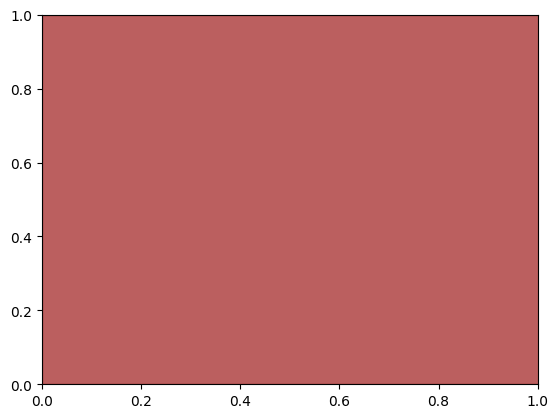

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # figure를 1 x 1 형태로 분할하고 그 중 1번째 위치에 하위 도표를 생성한다(그린다)

rect = plt.Rectangle((0, 0), 2, 1, color="brown", alpha=0.75) # 특정 점을 기준으로 지정한 너비와 높이만큼 확장하여 사각형을 그린다
                                                              # alpha 값은 그래프의 투명도(transparency)를 조절하기 위한 것으로 기본값은 1이며, 범위는 [0, 1]이다
ax.add_patch(rect) # 해당 axes("축(axis)들"을 의미하며, 실질적으로는 하나의 도표를 의미한다)에 patch 객체를 부여한다
                   # patch 객체는 면(face)과 선(edge)의 색을 가진 2차원 화가(artist라고 적혀있다)이다
                   # 이 코드가 없으면 위의 코드에서 색상을 지정해도 그래프에 색이 표현되지 않는다

plt.show()

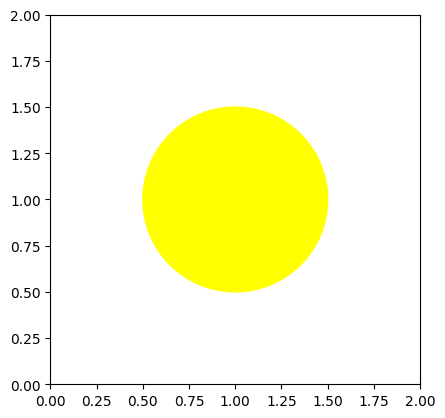

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

circ = plt.Circle((1, 1), 0.5, color="yellow")
ax.add_patch(circ)

plt.gca().set_aspect("equal") # 옆의 코드를 사용해야 원이 일그러지지 않는다
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

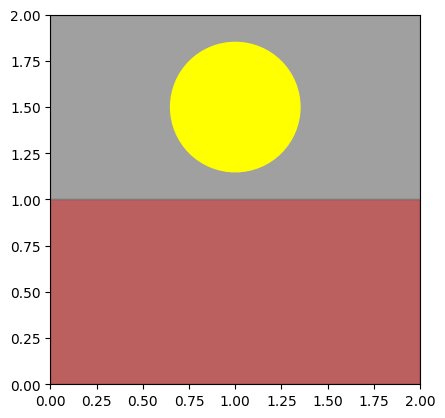

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # figure를 1 x 1 형태로 분할하고 그 중 1번째 위치에 하위 도표를 생성한다(그린다)

rect = plt.Rectangle((0, 0), 2, 1, color="brown", alpha=0.75) # 특정 점을 기준으로 지정한 너비와 높이만큼 확장하여 사각형을 그린다
                                                              # alpha 값은 그래프의 투명도(transparency)를 조절하기 위한 것으로 기본값은 1이며, 범위는 [0, 1]이다
rect2 = plt.Rectangle((0, 1), 2, 1, color="gray", alpha=0.75)
circ = plt.Circle((1, 1.5), 0.35, color="yellow") # 특정 점을 중점으로 한 특정 길의 반지름을 가진 원을 그린다

ax.add_patch(rect)
ax.add_patch(rect2)
ax.add_patch(circ) # 해당 axes("축(axis)들"을 의미하며, 실질적으로는 하나의 도표를 의미한다)에 patch 객체를 부여한다
                   # patch 객체는 면(face)과 선(edge)의 색을 가진 2차원 화가(artist라고 적혀있다)이다
                   # 이 코드가 없으면 위의 코드에서 색상을 지정해도 그래프에 색이 표현되지 않는다

# plt.gca()는 현재 (그려진 전체) 도표를 불러온다
# axes.set_aspect()는 도표의 화면 비율(종횡비)를 설정한다
plt.gca().set_aspect("equal") # x축과 y축의 스케일링을 동일하게 설정한다; 옆의 코드를 사용해야 원이 일그러지지 않는다
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

In [ ]:
1강의 수평선 그리기 부터